# Last Notebook: Model Training

## 1. Import Libraries and Load the Dataset

In [1]:
import pandas as pd
import numpy as np
import ast
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler

# 1. Load dataset
data = pd.read_csv('../data/learning_data.csv')

## 2. Convert string lists to actual lists


In [2]:
data['Region_Vector'] = data['Region_Vector'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)
data['Time_Vector'] = data['Time_Vector'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)
data['Category_Vector'] = data['Category_Vector'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)
data['Summary_Vector'] = data['Summary_Vector'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)


## 3. Expand the list-like columns into separate columns


In [3]:
region_encoded = pd.DataFrame(data['Region_Vector'].tolist(), columns=['America', 'Europe', 'Unknown', 'Other', 'Oceania', 'Asia', 'Africa'])
time_encoded = pd.DataFrame(data['Time_Vector'].tolist(), columns=['Unknown', 'Morning', 'Afternoon', 'Evening', 'Night'])
category_encoded = pd.DataFrame(data['Category_Vector'].tolist(), columns=['Military', 'Private', 'Commercial', 'Government', 'Other', 'Unknown'])
summary_encoded = pd.DataFrame(data['Summary_Vector'].tolist(), columns=['Visibility Issues', 'Weather-Related', 'Mechanical Problems', 'Emergency Landing', 'Human Factors', 'Unknown Causes', 'First or Second War'])


## 4. Concatenate the new columns back to the dataframe


In [4]:
data = pd.concat([data, region_encoded, time_encoded, category_encoded, summary_encoded], axis=1)


## 5. Drop the original vector columns


In [5]:
data = data.drop(columns=['Region_Vector', 'Time_Vector', 'Category_Vector', 'Summary_Vector'])


## 6. Convert the 'Date' column to datetime format

In [6]:
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')


## 7. Extract features from the 'Date' column


In [7]:
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Day'] = data['Date'].dt.day
data = data.drop(columns=['Date'])  # Drop the 'Date' column after extracting useful features


## 8. Convert all remaining columns to numeric


In [8]:
# Ensure there are no remaining string representations of lists
data = data.apply(pd.to_numeric, errors='ignore')

C:\Users\Anna\AppData\Local\Temp\ipykernel_17932\195188829.py:2: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  data = data.apply(pd.to_numeric, errors='ignore')


## 9. Prepare features (X) and target (y)



In [9]:
X = data.drop(columns=['Survives', 'Year', 'Month', 'Day', 'Fatalities','Aboard'])
y = data['Survives']

## 10. Split the data into training and test sets


In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## 11. Standardize the features


In [11]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


## 12. Initialize and train the Random Forest model


In [12]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

## 13. Make predictions


In [13]:
y_pred = model.predict(X_test)


## 14. Evaluate the model


In [14]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

# 15. Print the results


In [15]:
print(f"Accuracy: {accuracy:.4f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(report)

Accuracy: 0.6410
Confusion Matrix:
[[526 123]
 [236 115]]
Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.81      0.75       649
           1       0.48      0.33      0.39       351

    accuracy                           0.64      1000
   macro avg       0.59      0.57      0.57      1000
weighted avg       0.62      0.64      0.62      1000



# 16. Decision Tree Model

Decision Tree Accuracy: 0.6620
Confusion Matrix:
[[607  42]
 [296  55]]
Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.94      0.78       649
           1       0.57      0.16      0.25       351

    accuracy                           0.66      1000
   macro avg       0.62      0.55      0.51      1000
weighted avg       0.64      0.66      0.59      1000



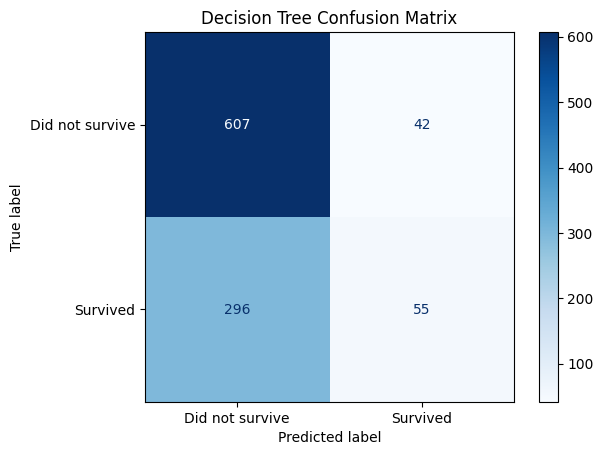

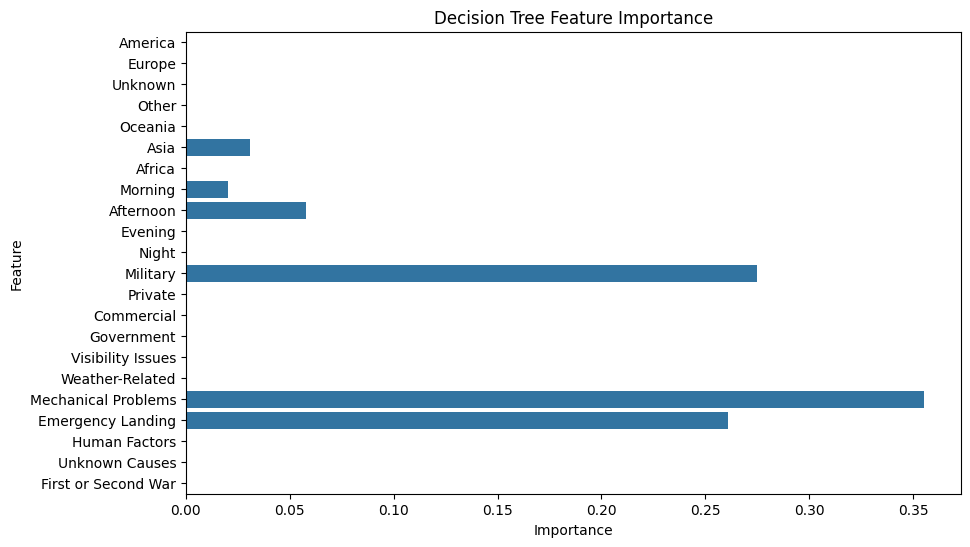

In [16]:
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns

dt_model = DecisionTreeClassifier(random_state=42, max_depth=3)

dt_model.fit(X_train, y_train)

y_pred_dt = dt_model.predict(X_test)


dt_accuracy = accuracy_score(y_test, y_pred_dt)
print(f"Decision Tree Accuracy: {dt_accuracy:.4f}")

dt_conf_matrix = confusion_matrix(y_test, y_pred_dt)
print("Confusion Matrix:")
print(dt_conf_matrix)

dt_report = classification_report(y_test, y_pred_dt)
print("Classification Report:")
print(dt_report)

# Plot confusion matrix
ConfusionMatrixDisplay(dt_conf_matrix, display_labels=['Did not survive', 'Survived']).plot(cmap='Blues', values_format='d')
plt.title('Decision Tree Confusion Matrix')
plt.show()

# Feature importance 
dt_feature_importances = dt_model.feature_importances_
plt.figure(figsize=(10, 6))
sns.barplot(x=dt_feature_importances, y=X.columns)
plt.title('Decision Tree Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()




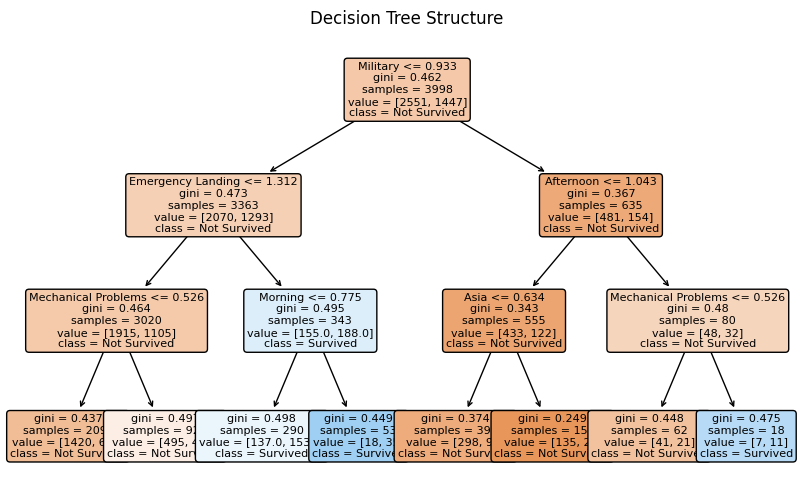

In [17]:
from sklearn.tree import export_graphviz
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Plot the tree structure
plt.figure(figsize=(10, 6))
plot_tree(dt_model, feature_names=X.columns, class_names=["Not Survived", "Survived"], filled=True, rounded=True, fontsize=8)
plt.title("Decision Tree Structure")
plt.show()


# Visualization

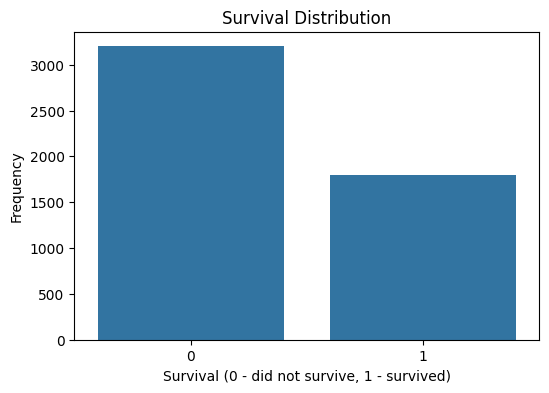

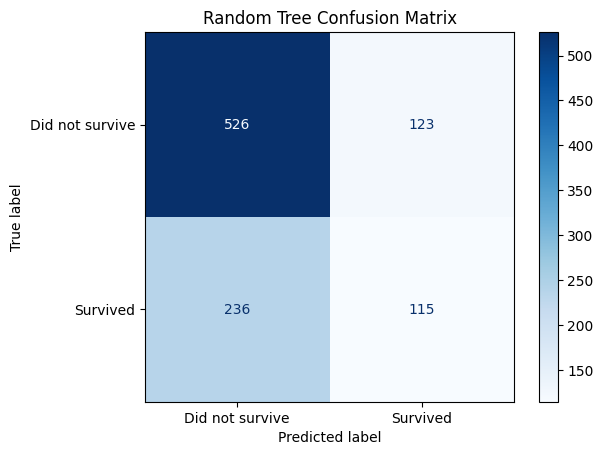

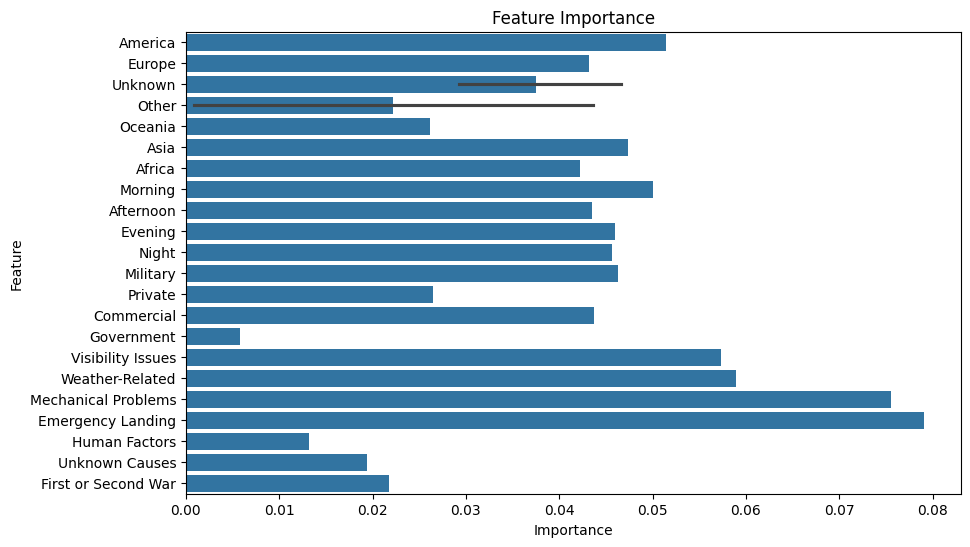

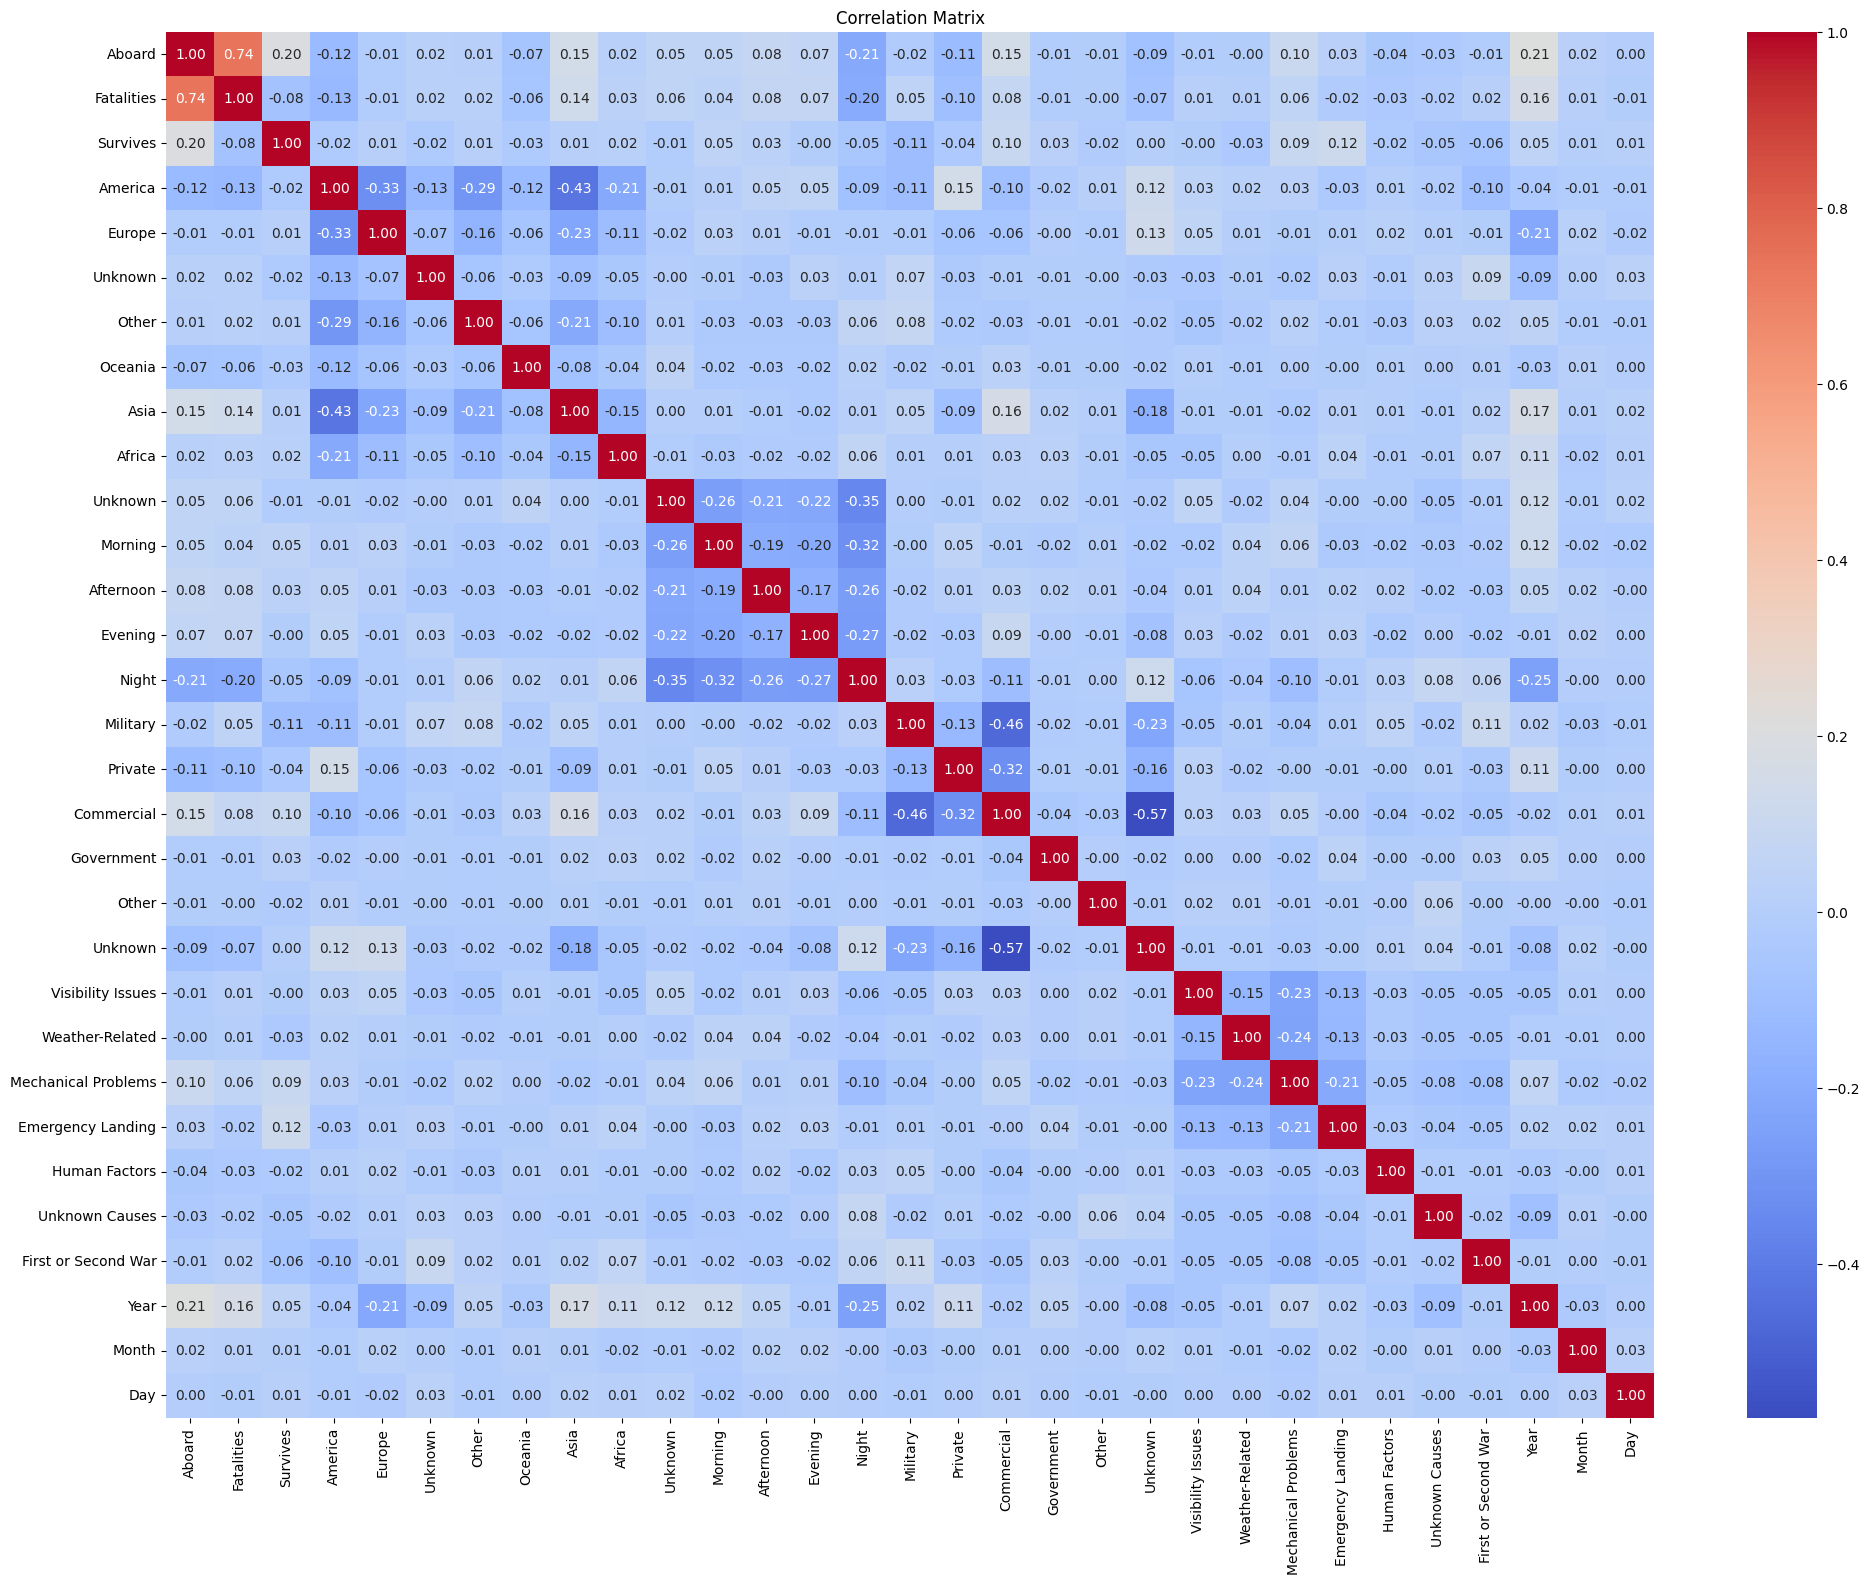

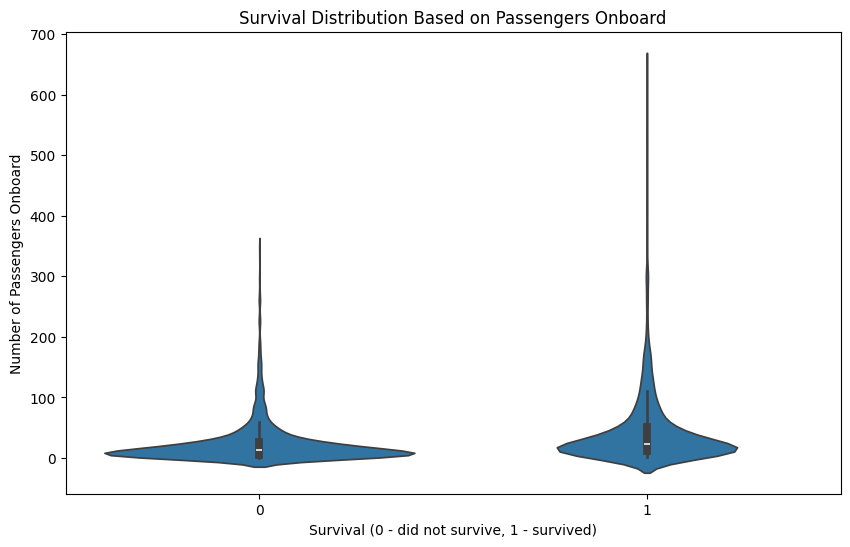

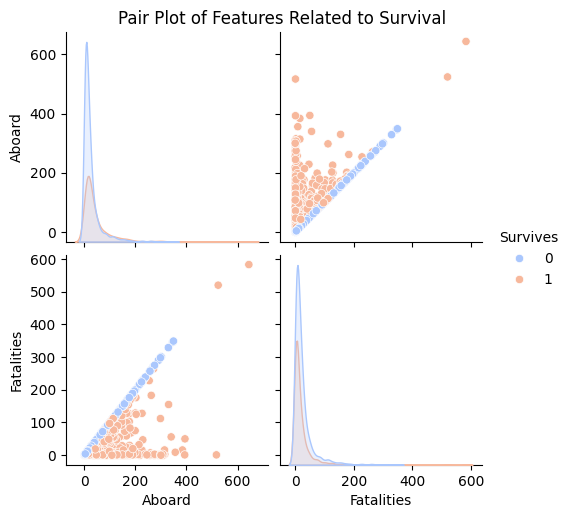

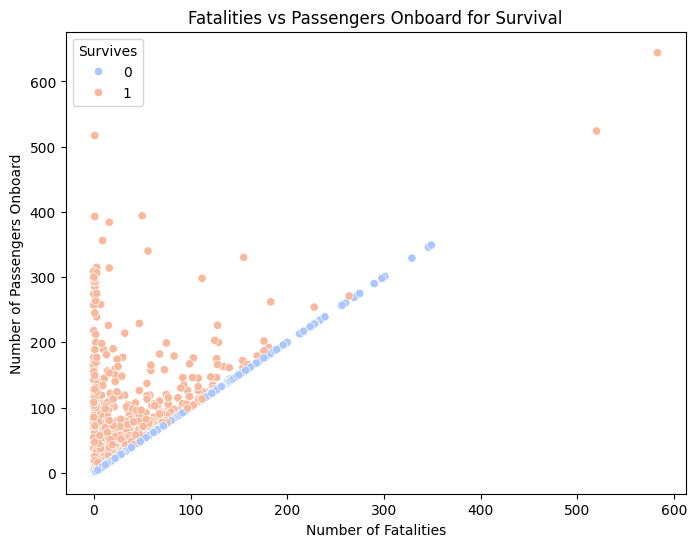

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay

# 1. Visualization of the target variable distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='Survives', data=data)
plt.title('Survival Distribution')
plt.xlabel('Survival (0 - did not survive, 1 - survived)')
plt.ylabel('Frequency')
plt.show()

# 2. Visualization of the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(conf_matrix, display_labels=['Did not survive', 'Survived']).plot(cmap='Blues', values_format='d')
plt.title('Random Tree Confusion Matrix')
plt.show()

# 3. Visualization of feature importance
feature_importances = model.feature_importances_
features = X.columns

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=features)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()



# 1. Correlation Plot: To check the relationship between numerical features and survival
corr_matrix = data.corr()  # Compute correlation matrix
plt.figure(figsize=(24, 18))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Correlation Matrix')
plt.show()

# 2. Violin Plot: Visualizing the distribution of numerical features for survivors vs non-survivors
plt.figure(figsize=(10, 6))
sns.violinplot(x='Survives', y='Aboard', data=data)
plt.title('Survival Distribution Based on Passengers Onboard')
plt.xlabel('Survival (0 - did not survive, 1 - survived)')
plt.ylabel('Number of Passengers Onboard')
plt.show()

# 3. Pair Plot: To visualize how different numerical features relate to survival
# Select only the necessary columns for the pairplot
pairplot_data = data[['Aboard', 'Fatalities', 'Survives']]

# Now, create the pairplot
sns.pairplot(pairplot_data, hue='Survives', palette='coolwarm')
plt.suptitle('Pair Plot of Features Related to Survival', y=1.02)
plt.show()

# 4. Scatter Plot: To examine the relationship between the number of fatalities and survival
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Fatalities', y='Aboard', hue='Survives', data=data, palette='coolwarm')
plt.title('Fatalities vs Passengers Onboard for Survival')
plt.xlabel('Number of Fatalities')
plt.ylabel('Number of Passengers Onboard')
plt.show()


## Consolution

### How the Classification Works:

**Input Data**: The model takes a set of features (e.g., region, number of passengers, time of day, flight category) that describe an aviation accident. These features may be numerical or categorical and are usually encoded and normalized before training.

**Training**: The model is trained on historical data to predict the target variable, `Survives`. It learns the patterns between features and the outcome (survival or not). Random Forest, an ensemble model, is used, which helps prevent overfitting and improves predictions by training on random subsets of data and features.

**Prediction**: After training, the model predicts survival (1) or non-survival (0) for each test case based on the features provided. If the predicted probability exceeds a threshold (usually 0.5), it classifies the case as 1 (survived); otherwise, as 0 (did not survive).

**Decision Making**: The Random Forest consists of multiple decision trees. Each tree makes a classification decision, and the final result is determined by a majority vote. If most trees predict survival (1), the result is 1; if most predict non-survival (0), the result is 0.

**Key Points**:
- The model uses multiple features, and some may be more important than others (e.g., the number of passengers may influence the likelihood of survival).
- The model is trained on historical data, so its predictions depend on past conditions. Changes in future accident scenarios may affect accuracy.

**Example**:  
For an accident with these features:  
- Region: America  
- Time: Morning  
- Flight Category: Commercial  
- Passengers: 200  

The model will predict survival based on these factors. If most trees predict survival, the model outputs 1; otherwise, it outputs 0.

**What the model classifies**:  
The model classifies each accident as:
- 0 — if no one survived or there were many casualties.  
- 1 — if at least one person survived.